In [14]:
import praat_formants_python as pfp
import scipy.io.wavfile as wav
import numpy as np
import pandas as pd
from tqdm import tqdm
np.set_printoptions(suppress=True)

In [45]:
test = ['/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV', '11240', '12783', 'iy']

test2 = ['/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SI943.WAV',13727,15160,'ah']

In [8]:
fs = 16000

In [54]:
temp = pfp.formants_at_interval(test2[0], (int(test2[1] )/ fs) - 0.1, int(test2[2] )/ fs,
                         maxformant=5500, winlen=0.025, preemph=50)

In [55]:
print(temp.mean(axis=0))

[   0.848406    690.70089474 1612.90457895 2467.81926316]


In [41]:
int(test[2] )/ fs 

0.7989375

In [52]:
FS = 16000
all_timit_vowels_path = "/home/jeevan/projects/Asquire/Formants/all_timit_vowels.csv"
vowels = pd.read_csv(all_timit_vowels_path)
vowels["start_sec"] = vowels["start"] / FS
vowels["end_sec"] = vowels["end"] / FS
vowels

,filepath,start,end,phone,start_sec,end_sec
0,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,11240,12783,iy,0.702500,0.798937
1,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,14078,16157,ae,0.879875,1.009813
2,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,17587,18760,er,1.099187,1.172500
3,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,19962,21514,aa,1.247625,1.344625
4,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,26280,28591,uw,1.642500,1.786938
...,...,...,...,...,...,...
78369,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,22751,23586,ao,1.421938,1.474125
78370,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,24520,25386,ih,1.532500,1.586625
78371,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,26843,28490,ay,1.677687,1.780625
78372,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,30310,31707,ih,1.894375,1.981688


In [68]:
vowels.reset_index()

F = []
for index, row in tqdm(vowels.iterrows()):
    formants = pfp.formants_at_interval(row['filepath'], row['start_sec'], row['end_sec'], 
                                        maxformant=5500, winlen=0.025, preemph=50)
    formants = formants.mean(axis=0)
    f_row = [row["filepath"], row["phone"]] + list(formants)[1:]
    F.append(f_row)
    

78374it [12:38, 103.28it/s]


In [78]:
formants_df = pd.DataFrame(F)
formants_df.columns = ["filepath", "phone", "f1", "f2", "f3"]

In [79]:
formants_df

,filepath,phone,f1,f2,f3
0,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,iy,468.354889,2320.570000,2839.730333
1,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,ae,840.217462,1879.477692,2768.645000
2,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,er,613.416571,1818.399571,2227.838429
3,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,aa,786.415600,1457.486700,2400.440200
4,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,uw,522.480643,1592.871000,2758.406786
...,...,...,...,...,...
78369,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ao,578.490000,821.363200,2027.845600
78370,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ih,491.960600,1601.858800,2672.206200
78371,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ay,673.321000,1436.068800,2380.725200
78372,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ih,422.332222,2033.473667,2634.352444


In [82]:
f_df = vowels.merge(formants_df, how = 'inner', on = ['filepath', "phone"])

In [93]:
ALL = pd.concat([vowels, formants_df], axis=1)
ALL

,filepath,start,end,phone,start_sec,end_sec,filepath,phone,f1,f2,f3
0,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,11240,12783,iy,0.702500,0.798937,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,iy,468.354889,2320.570000,2839.730333
1,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,14078,16157,ae,0.879875,1.009813,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,ae,840.217462,1879.477692,2768.645000
2,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,17587,18760,er,1.099187,1.172500,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,er,613.416571,1818.399571,2227.838429
3,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,19962,21514,aa,1.247625,1.344625,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,aa,786.415600,1457.486700,2400.440200
4,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,26280,28591,uw,1.642500,1.786938,/tmp/DATASETS/TIMIT/TIMIT/TEST/DR1/FAKS0/SA1.WAV,uw,522.480643,1592.871000,2758.406786
...,...,...,...,...,...,...,...,...,...,...,...
78369,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,22751,23586,ao,1.421938,1.474125,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ao,578.490000,821.363200,2027.845600
78370,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,24520,25386,ih,1.532500,1.586625,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ih,491.960600,1601.858800,2672.206200
78371,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,26843,28490,ay,1.677687,1.780625,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ay,673.321000,1436.068800,2380.725200
78372,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,30310,31707,ih,1.894375,1.981688,/tmp/DATASETS/TIMIT/TIMIT/TRAIN/DR8/MTCS0/SX82...,ih,422.332222,2033.473667,2634.352444


In [96]:
all_timit_vowel_formants_df = ALL.loc[:,~ALL.columns.duplicated()]
# all_timit_vowel_formants_df.to_csv("all_timit_vowel_formants.csv", index=False)

In [112]:
vowel_formants_praat_df = all_timit_vowel_formants_df[["phone", "f1", "f2", "f3"]]
vowel_formants_praat_df['pitch'] = np.random.randint(100, 300, vowel_formants_praat_df.shape[0]) 
# vowel_formants_praat_df
vowel_formants_praat_df.to_csv("vowel_formants_praat.csv", index=True)

/tmp/ipykernel_97313/1474706457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vowel_formants_praat_df['pitch'] = np.random.randint(100, 300, vowel_formants_praat_df.shape[0])


In [102]:
import matplotlib.pyplot as plt

(array([7962., 7878., 7856., 7684., 7808., 7879., 7856., 7891., 7817.,
        7743.]),
 array([100. , 119.9, 139.8, 159.7, 179.6, 199.5, 219.4, 239.3, 259.2,
        279.1, 299. ]),
 <BarContainer object of 10 artists>)

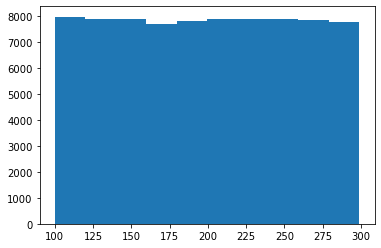

In [111]:
plt.hist(vowel_formants_praat_df['pitch'].values)

In [75]:
78374 * 2

156748

In [4]:
import os
import numpy as np
from tqdm import tqdm
import praat_formants_python as pfp


clean_vowel_data_path = "/home/jeevan/projects/Asquire/Vowtiar/MakeVow/sampled_vowel_data_2"
reverb_vowel_data_path = "/home/jeevan/projects/Asquire/Vowtiar/MakeVow/reverb_data_sampled_2"

DUR = 5
CHUNK_DUR = DUR/3

clean_vowels = os.listdir(clean_vowel_data_path)
reverb_vowels = os.listdir(reverb_vowel_data_path)

clean_vowels = [os.path.join(clean_vowel_data_path, p) for p in clean_vowels]
reverb_vowels = [os.path.join(reverb_vowel_data_path, p) for p in reverb_vowels]


print(clean_vowels[0])
print(reverb_vowels[0])

/home/jeevan/projects/Asquire/Vowtiar/MakeVow/sampled_vowel_data_2/ix_152_75104.wav
/home/jeevan/projects/Asquire/Vowtiar/MakeVow/reverb_data_sampled_2/ay_266_44550_largeroom1_near_anglb.wav


In [97]:
clean_formants = []
for p in tqdm(clean_vowels):
    formants = pfp.formants_at_interval(p, CHUNK_DUR, CHUNK_DUR * 2, 
                                        maxformant=5500, winlen=0.025, preemph=50)

    name = os.path.basename(p).replace(".wav", "")
    phn, pitch, id = name.split("_")

    info = [id, name, phn, pitch]

    fm_mean = formants.mean(axis=0)[1:]
    fm_std = formants.std(axis=0)[1:]

    # print(formants)
    clean_formants.append(np.concatenate([info, fm_mean, fm_std]))

    # break

columns=["id", "filename", "phone", "pitch", "f1_praat_clean_mean", "f2_praat_clean_mean","f3_praat_clean_mean","f1_praat_clean_std","f2_praat_clean_std","f3_praat_clean_std"]
clean_formants_df = pd.DataFrame(clean_formants, columns=columns)
clean_formants_df.to_csv("clean_vowel_formants_sampled_40.csv", index=False)

100%|██████████| 400/400 [01:00<00:00,  6.57it/s]


In [98]:
pfp.clear_formant_cache()

In [5]:
reverb_formants = []
for p in tqdm(reverb_vowels):
    formants = pfp.formants_at_interval(p, CHUNK_DUR, CHUNK_DUR * 2, 
                                        maxformant=5500, winlen=0.025, preemph=50)

    name = os.path.basename(p).replace(".wav", "")
    fname = name.split("_")
    phn, pitch, id = fname[:3]
    rir_typ = "_".join(fname[3:])

    # print(rir_typ)

    basename = "_".join(fname[:3])

    info = [id, basename, phn, pitch, rir_typ]

    fm_mean = formants.mean(axis=0)[1:]
    fm_std = formants.std(axis=0)[1:]

    #reverb_formants.append(np.concatenate([info, fm_mean, fm_std], dtype=object))
    reverb_formants.append(np.concatenate([info, fm_mean, fm_std]))


    # break

columns=["id", "filename", "phone", "pitch", "rir_type", "f1_praat_rir_mean", "f2_praat_rir_mean","f3_praat_rir_mean","f1_praat_rir_std","f2_praat_rir_std","f3_praat_rir_std"]
reverb_formants_df = pd.DataFrame(reverb_formants, columns=columns)
reverb_formants_df.to_csv("reverb_vowel_formants_sampled_40.csv", index=False)
reverb_formants_df

 25%|██▌       | 1212/4800 [02:51<08:33,  6.98it/s]/home/jeevan/projects/Asquire/Formants/praat_formants_python/praat_formants_python/_formants.py:151: UserWarning: undefined formant found
  warnings.warn('undefined formant found')
 47%|████▋     | 2263/4800 [05:20<06:12,  6.80it/s]/home/jeevan/projects/Asquire/Formants/praat_formants_python/praat_formants_python/_formants.py:151: UserWarning: undefined formant found
  warnings.warn('undefined formant found')
 82%|████████▏ | 3935/4800 [09:22<02:05,  6.89it/s]/home/jeevan/projects/Asquire/Formants/praat_formants_python/praat_formants_python/_formants.py:151: UserWarning: undefined formant found
  warnings.warn('undefined formant found')
100%|██████████| 4800/4800 [11:28<00:00,  6.97it/s]


NameError: name 'pd' is not defined

In [70]:
original_df = pd.read_csv("vowel_formants_praat.csv")
clean_df = pd.read_csv("clean_vowel_formants_sampled.csv")
reverb_df = pd.read_csv("reverb_vowel_formants_sampled.csv")

In [78]:
original_df[original_df["id"] == 60960]

,id,phone,f1,f2,f3,pitch
60960,60960,ae,640.688,1770.609333,2405.725267,107


In [80]:
clean_original_merge_df = pd.merge(clean_df, original_df, on='id')
clean_original_merge_df

,id,filename,phone_x,pitch_x,f1_praat_clean_mean,f2_praat_clean_mean,f3_praat_clean_mean,f1_praat_clean_std,f2_praat_clean_std,f3_praat_clean_std,phone_y,f1,f2,f3,pitch_y
0,21540,ix_285_21540,ix,285,565.604849,993.777163,1803.331849,5.278788,107.337013,60.194256,ix,538.724750,1831.524000,3184.630000,285
1,57498,ih_198_57498,ih,198,472.595392,960.953512,1556.048373,10.851863,57.734859,12.014684,ih,485.496000,1514.260833,2350.342500,198
2,45714,ay_163_45714,ay,163,667.015145,1058.538705,1845.953361,7.301228,41.418431,14.010545,ay,703.012222,1850.234167,2748.434500,163
3,67187,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923,eh,761.224286,2064.107286,3126.057714,216
4,6468,iy_258_6468,iy,258,467.775898,940.709699,2027.971982,66.910602,546.520025,316.612243,iy,439.368667,1883.505000,2561.007000,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8623,ih_111_8623,ih,111,663.618422,909.353488,2227.745386,4.199648,44.753196,11.845702,ih,667.568522,2238.979826,3325.908826,111
96,34249,ux_278_34249,ux,278,728.550548,806.234331,1687.817253,33.348127,45.278571,8.310795,ux,711.153200,1714.695000,2472.183300,278
97,46280,ow_289_46280,ow,289,577.190446,1095.538530,1207.190602,5.060816,63.196668,69.646063,ow,591.437333,1165.517556,2502.034222,289
98,49189,uh_152_49189,uh,152,476.797952,1025.691416,1840.820970,5.910251,40.048589,8.410137,uh,509.555727,1844.738818,2725.252727,152


In [79]:
reverb_original_merge_df = pd.merge(reverb_df, clean_df, on='id')
reverb_original_merge_df[reverb_original_merge_df["id"] == 67187]

,id,filename_x,phone_x,pitch_x,rir_type,f1_praat_rir_mean,f2_praat_rir_mean,f3_praat_rir_mean,f1_praat_rir_std,f2_praat_rir_std,f3_praat_rir_std,filename_y,phone_y,pitch_y,f1_praat_clean_mean,f2_praat_clean_mean,f3_praat_clean_mean,f1_praat_clean_std,f2_praat_clean_std,f3_praat_clean_std
228,67187,eh_216_67187,eh,216,smallroom1_near_anglb,820.100837,1959.340759,2781.269651,43.968071,44.748925,330.455032,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
229,67187,eh_216_67187,eh,216,smallroom1_near_angla,781.407349,1889.961916,2769.968271,198.809639,330.066818,426.733764,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
230,67187,eh_216_67187,eh,216,smallroom1_far_anglb,794.864795,1764.595229,2464.997765,133.727894,376.701806,396.851692,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
231,67187,eh_216_67187,eh,216,mediumroom1_near_anglb,292.498970,919.307157,2055.724036,162.332197,303.093359,215.610257,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
232,67187,eh_216_67187,eh,216,smallroom1_far_angla,685.107578,1100.398235,1958.213651,41.723206,209.594380,30.755534,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
233,67187,eh_216_67187,eh,216,largeroom1_near_angla,685.606783,1451.583506,2621.161012,194.911187,512.538125,510.700075,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
234,67187,eh_216_67187,eh,216,largeroom1_far_anglb,552.913476,981.406795,2067.137084,159.330482,379.545121,324.710452,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
235,67187,eh_216_67187,eh,216,mediumroom1_far_anglb,682.408717,1610.777693,2135.611054,105.139218,312.281613,249.253325,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
236,67187,eh_216_67187,eh,216,largeroom1_near_anglb,627.816711,1675.102633,2742.334614,160.380941,554.799086,460.331478,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923
237,67187,eh_216_67187,eh,216,mediumroom1_far_angla,816.716464,1754.632127,2177.491265,124.125177,231.035754,263.997100,eh_216_67187,eh,216,713.450482,1051.842199,2066.779639,14.805832,39.761818,19.713923


In [95]:
reverb_original_clean_merge_df = pd.merge(reverb_original_merge_df, original_df, on='id')
reverb_original_clean_merge_df = reverb_original_clean_merge_df.drop(columns=["phone_x", "pitch_x",'filename_y', 'phone_y','pitch_y']).rename(columns={"filename_x": "filename"})

cols = ['id', 'filename','rir_type', 'phone', 'pitch', 'f1', 'f2', 'f3', 
       'f1_praat_clean_mean', 'f2_praat_clean_mean','f3_praat_clean_mean', 'f1_praat_clean_std', 'f2_praat_clean_std','f3_praat_clean_std',
       'f1_praat_rir_mean', 'f2_praat_rir_mean','f3_praat_rir_mean', 'f1_praat_rir_std', 'f2_praat_rir_std','f3_praat_rir_std'] 
reverb_original_clean_merge_df = reverb_original_clean_merge_df[cols]
reverb_original_clean_merge_df.to_csv("original_clean_reverb_merge.csv")

In [ ]:
reverb_original_clean_merge_df